In [1]:
import torch
print(torch.__version__)

2.0.1+cu118


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [4]:
!nvidia-smi

Tue Aug 15 10:14:50 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8               1W /  50W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print("Path already Exists")
else:
    print("Creating new directory")
    image_path.mkdir(parents=True, exist_ok=True)

zip_path = data_path / "pizza_steak_sushi.zip"
if zip_path.exists():
    print("Skipping... Data already downloaded")
else:
    with open(zip_path, "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)
        print("Downloading data")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(image_path)

Path already Exists
Skipping... Data already downloaded


In [6]:
import os
for dirpath, dirnames, filename in os.walk(image_path):
    print(f"There are {len(dirnames)} directories and {len(filename)} files in {dirpath}.")

There are 2 directories and 0 files in data\pizza_steak_sushi.
There are 3 directories and 0 files in data\pizza_steak_sushi\test.
There are 0 directories and 25 files in data\pizza_steak_sushi\test\pizza.
There are 0 directories and 19 files in data\pizza_steak_sushi\test\steak.
There are 0 directories and 31 files in data\pizza_steak_sushi\test\sushi.
There are 3 directories and 0 files in data\pizza_steak_sushi\train.
There are 0 directories and 78 files in data\pizza_steak_sushi\train\pizza.
There are 0 directories and 75 files in data\pizza_steak_sushi\train\steak.
There are 0 directories and 72 files in data\pizza_steak_sushi\train\sushi.


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"

Image Path: data\pizza_steak_sushi\train\sushi\1129338.jpg
Image class: sushi
Image Height: 512
Image Width: 511


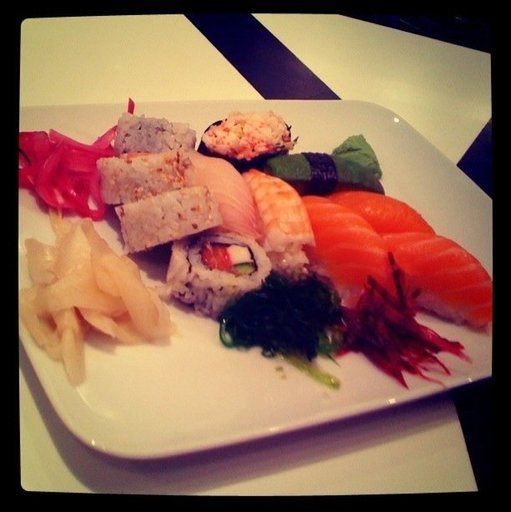

In [8]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_img_path = random.choice(image_path_list)

random_img_class_name = random_img_path.parent.stem

img = Image.open(random_img_path)
print(f"Image Path: {random_img_path}")
print(f"Image class: {random_img_class_name}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

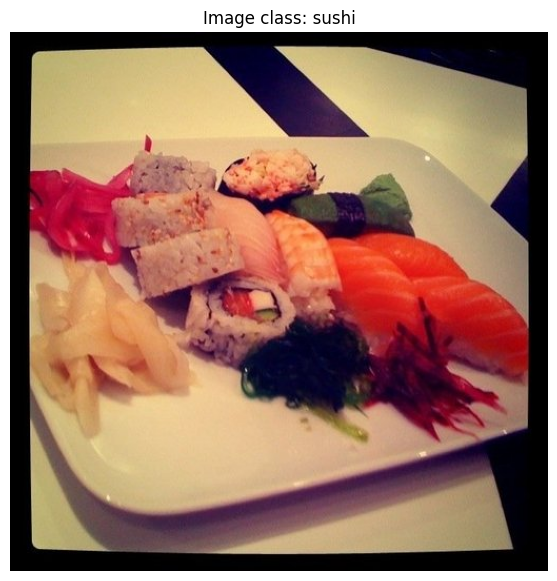

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_img_class_name}")
plt.axis(False);

In [10]:
import torch
from torchvision import transforms, datasets

data_transformer = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [11]:
data_transformer(img).shape

torch.Size([3, 64, 64])

In [12]:
def plot_transformed_img(image_paths: list, transforms, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_img_paths = random.sample(image_paths, k=n)
    for image_path in random_img_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Image:\n {f.size}")
            ax[0].axis(False)

            tranformed_f = transforms(f).permute(1, 2, 0)
            ax[1].imshow(tranformed_f)
            ax[1].set_title(f"Transformed Image:\n {tranformed_f.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


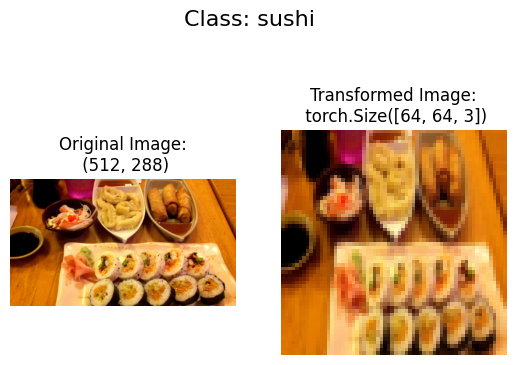

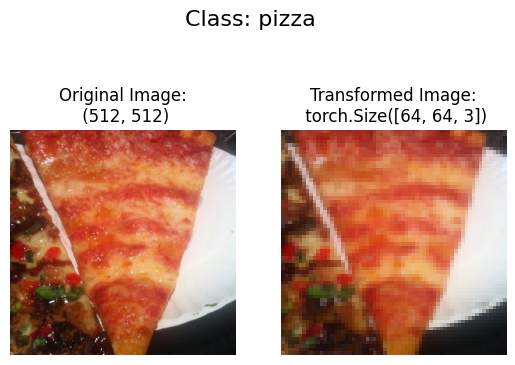

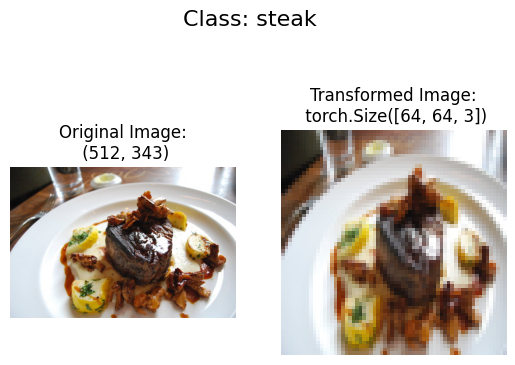

In [13]:
plot_transformed_img(image_paths=image_path_list,
                     transforms=data_transformer,
                     n=3)

In [14]:
train_dir

WindowsPath('data/pizza_steak_sushi/train')

In [15]:
train_data = datasets.ImageFolder(train_dir,
                                  transform=data_transformer,
                                  target_transform=None)

test_data = datasets.ImageFolder(test_dir,
                                 transform=data_transformer,
                                 target_transform=None)

In [16]:
class_names = train_data.classes

In [17]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [19]:
train_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [20]:
img, label = train_data[0][0], train_data[0][1]

In [21]:
img_permuted = img.permute(1, 2, 0)

(-0.5, 63.5, 63.5, -0.5)

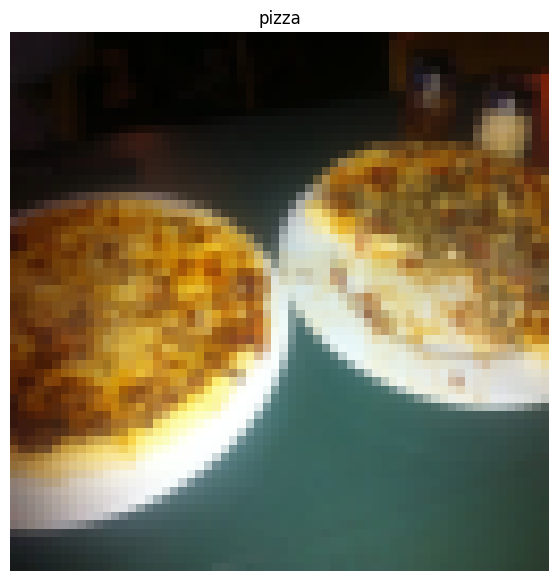

In [22]:
plt.figure(figsize=(10, 7))
plt.imshow(img_permuted)
plt.title(class_names[label])
plt.axis(False)

In [23]:
os.cpu_count()

16

In [24]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
N_WORKERS = os.cpu_count()
# N_WORKERS = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=N_WORKERS)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=N_WORKERS)

In [25]:
img, label = next(iter(train_dataloader))

In [26]:
print(f"Image Shape: {img.shape}")
print(f"Label shape: {len(label)}")

Image Shape: torch.Size([1, 3, 64, 64])
Label shape: 1


In [27]:
import os
import pathlib
import torch

from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
from typing import Tuple, Dict, List

In [28]:
target_dir = train_dir

class_names = sorted([directory.name for directory in list(os.scandir(target_dir))])

In [29]:
class_names

['pizza', 'steak', 'sushi']

In [30]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [31]:
def directory_to_classes(path: str) -> Tuple[list[str], Dict[str, int]] :
    class_names = sorted([directory.name for directory in list(os.scandir(path)) if directory.is_dir()])

    if not class_names:
        raise FileNotFoundError(f"The structure of {path} is wrong... Please Check.")
    classes_to_idx = {item: i for i, item in enumerate(class_names)}
    return class_names, classes_to_idx

In [32]:
directory_to_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [33]:
from torch.utils.data import Dataset

In [34]:
class ImageFolderCustom(Dataset):
    def __init__(self,
                 target_dir: str,
                 transform=None):
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classnames, self.class_to_idx = directory_to_classes(target_dir)
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    def __len__(self) -> int:
        return len(self.paths)
    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx



In [35]:
train_transform = transforms.Compose([
    transforms.Resize([64, 64]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

In [36]:
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                      transform=train_transform)
test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                     transform=test_transform)

In [37]:
train_data_custom.classnames

['pizza', 'steak', 'sushi']

In [38]:
len(train_data), len(train_data_custom)

(225, 225)

In [39]:
len(test_data), len(test_data_custom)

(75, 75)

In [40]:
def display_random_images(dataset: torch.utils.data.Dataset,
                            classes: list[str]=None,
                            n: int = 10,
                            display_shape: bool = True,
                            seed: int = None
                            ):
    if n > 10:
        print("Size cannot be greater than 10")
        n = 10
        display_shape = False
    if seed:
        random.seed(seed)
    random_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        adjusted_targ_image = targ_image.permute(1, 2, 0)
        plt.subplot(1, n, i+1)
        plt.imshow(adjusted_targ_image)
        if classes:
            title = f"Class: {(classes[targ_label])}"
            if display_shape:
                title += f"\nShape: {targ_image.shape}"
        plt.title(title)
        plt.axis(False)

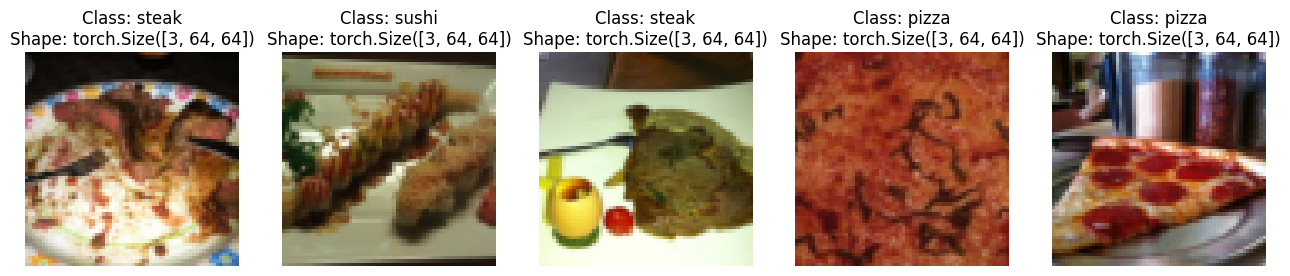

In [41]:
display_random_images(dataset=train_data,
                      classes=class_names,
                      n=5,
                      display_shape=True)

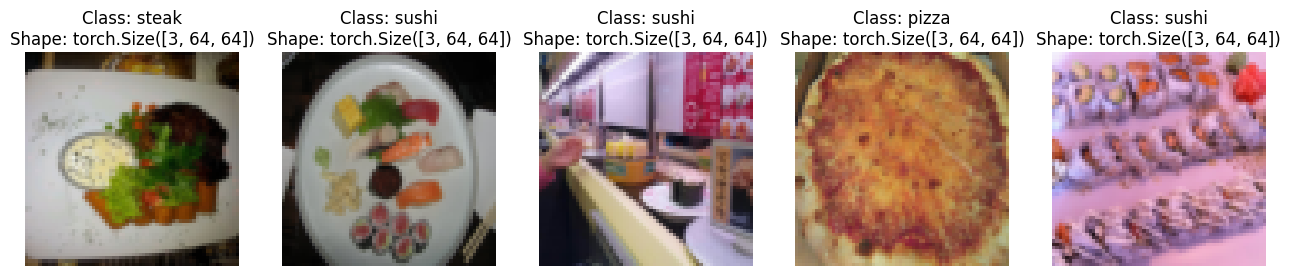

In [42]:
display_random_images(dataset=train_data_custom,
                      classes=class_names,
                      n=5,
                      display_shape=True)

## Custom Train DataLoader

In [43]:
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data_custom,
                               batch_size=BATCH_SIZE,
                            #    num_workers=NUM_WORKERS,
                               shuffle=True)
test_dataloader = DataLoader(dataset=test_data_custom,
                             batch_size=BATCH_SIZE,
                            #  num_workers=NUM_WORKERS,
                             shuffle=False)

In [44]:
img, label = next(iter(train_dataloader))

In [45]:
print(f"Image Shape: {img.shape}")
print(f"Label Shape: {label.shape}")

Image Shape: torch.Size([1, 3, 64, 64])
Label Shape: torch.Size([1])


## Bulding State of the art Data-Augmentation models - https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [46]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [47]:
images_path_list = image_path.glob("*/*/*.jpg")

In [48]:
image_path_list

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

In [49]:
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

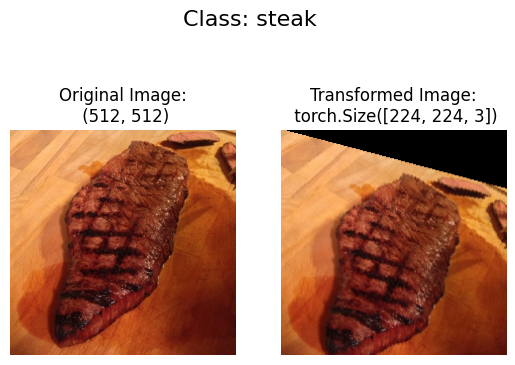

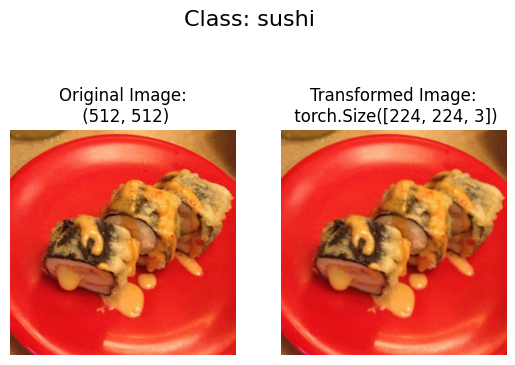

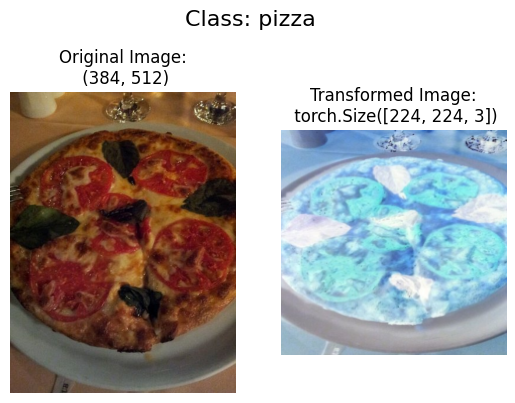

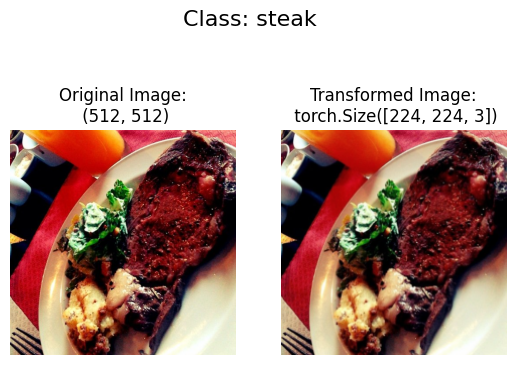

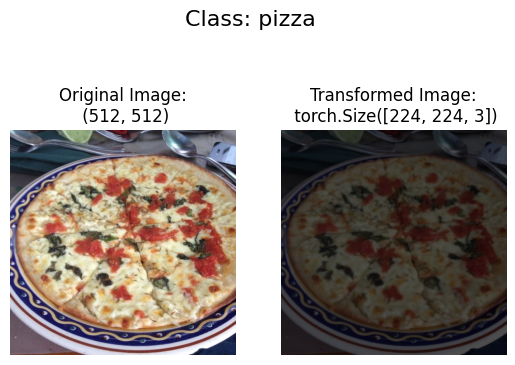

In [50]:
plot_transformed_img(image_path_list, train_transform, n=5)

## Building a simple TinyVGG model without Data Augmentation

In [51]:
from torchvision import transforms
simple_transform =  transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

### Load in the dataset

In [52]:
from torchvision.datasets import ImageFolder
train_data_simple = ImageFolder(root=train_dir,
                            transform=simple_transform)
test_data_simple = ImageFolder(root=test_dir,
                        transform=simple_transform)

from torch.utils.data import DataLoader
BATCH_SIZE = 32
N_WORKERS = os.cpu_count()
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                              batch_size=BATCH_SIZE,
                            #   num_workers=N_WORKERS,
                              shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                             batch_size=BATCH_SIZE,
                            #  num_workers=N_WORKERS,
                             shuffle=False)

### Building our model

In [53]:
class TinyVGG_V0(torch.nn.Module):
    def __init__(self, in_features, hidden_units, out_features):
        super().__init__()
        self.conv_block_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=in_features,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=0),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=hidden_units,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,
                                stride=2),
        )
        self.conv_block_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=hidden_units,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=0),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=hidden_units,
                            out_channels=hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,
                                stride=2),
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=hidden_units * 13 * 13,
                            out_features=out_features)
        )
    def forward(self, x):
        # print(x.shape)
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [54]:
model_0 = TinyVGG_V0(in_features=3,
                     hidden_units=10,
                     out_features=len(train_data.classes)).to(device)

In [55]:
model_0

TinyVGG_V0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [56]:
img_sample, label = next(iter(train_dataloader_simple))

In [57]:
img_sample.shape

torch.Size([32, 3, 64, 64])

In [58]:
model_0(img_sample.to(device))

tensor([[ 0.0014,  0.0286, -0.0397],
        [ 0.0019,  0.0326, -0.0395],
        [ 0.0060,  0.0276, -0.0449],
        [-0.0019,  0.0361, -0.0412],
        [ 0.0010,  0.0359, -0.0401],
        [-0.0002,  0.0340, -0.0413],
        [ 0.0005,  0.0330, -0.0484],
        [-0.0008,  0.0301, -0.0368],
        [-0.0052,  0.0380, -0.0421],
        [-0.0007,  0.0332, -0.0409],
        [-0.0017,  0.0345, -0.0415],
        [ 0.0005,  0.0330, -0.0430],
        [ 0.0007,  0.0308, -0.0472],
        [ 0.0001,  0.0327, -0.0394],
        [-0.0001,  0.0337, -0.0435],
        [ 0.0021,  0.0356, -0.0419],
        [ 0.0020,  0.0311, -0.0434],
        [ 0.0005,  0.0342, -0.0389],
        [ 0.0085,  0.0342, -0.0437],
        [-0.0007,  0.0346, -0.0407],
        [ 0.0027,  0.0293, -0.0427],
        [ 0.0004,  0.0305, -0.0386],
        [ 0.0004,  0.0369, -0.0418],
        [ 0.0018,  0.0319, -0.0439],
        [-0.0008,  0.0343, -0.0386],
        [ 0.0024,  0.0293, -0.0430],
        [ 0.0027,  0.0284, -0.0443],
 

In [59]:
10*16*16

2560

In [60]:
!pip install torchinfo

In [61]:
from torchinfo import summary
summary(model_0, [1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG_V0                               [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### Creating Train step and test step functions

In [62]:
def train_step(train_dataloader,
                loss_fn,
                optimizer,
                model,
                device=device):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        y_preds = model(X)
        loss = loss_fn(y_preds, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred_class)
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    return train_loss, train_acc


In [63]:
def test_step(test_dataloader,
                loss_fn,
                model,
                device):
    test_loss, test_acc = 0, 0
    for batch, (X, y) in enumerate(test_dataloader):
        X, y = X.to(device), y.to(device)
        model.eval()
        with torch.inference_mode():
            y_preds = model(X)
            loss = loss_fn(y_preds, y)
            test_loss += loss.item()
            test_preds_labels = torch.argmax(y_preds, dim=1)
            test_acc +=  (test_preds_labels == y).sum().item() / len(test_preds_labels)  
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        return test_loss, test_acc         

In [64]:
from tqdm.auto import tqdm
def train(model,
            train_dataloader,
            test_dataloader,
            loss_fn,
            optimizer,
            device,
            epochs):
    results = {"train_loss":[],
                "train_acc": [],
                "test_loss": [],
                "test_acc": []}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(train_dataloader=train_dataloader, 
                                            loss_fn=loss_fn, 
                                            optimizer=optimizer,
                                            model=model,
                                            device=device)
        test_loss, test_acc = test_step(test_dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        model=model,
                                        device=device)
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc: .4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

In [65]:
NUM_EPOCHS = 5
model_0 = TinyVGG_V0(in_features=3,
                     hidden_units=10,
                     out_features=len(train_data_simple.classes)).to(device)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        device=device,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1123 | Train Accuracy:  0.2812 | Test Loss: 0.3580 | Test Accuracy: 0.2604
Epoch: 1 | Train Loss: 1.0859 | Train Accuracy:  0.3945 | Test Loss: 0.4023 | Test Accuracy: 0.0000
Epoch: 2 | Train Loss: 1.1259 | Train Accuracy:  0.2812 | Test Loss: 0.4010 | Test Accuracy: 0.0000
Epoch: 3 | Train Loss: 1.0963 | Train Accuracy:  0.2812 | Test Loss: 0.3697 | Test Accuracy: 0.0312
Epoch: 4 | Train Loss: 1.0879 | Train Accuracy:  0.3203 | Test Loss: 0.3593 | Test Accuracy: 0.1562
Total training time: 9.928 seconds


In [66]:
model_0_results

{'train_loss': [1.112322598695755,
  1.0859307497739792,
  1.125897079706192,
  1.0962828695774078,
  1.0878998935222626],
 'train_acc': [0.28125, 0.39453125, 0.28125, 0.28125, 0.3203125],
 'test_loss': [0.3579929272333781,
  0.4023471275965373,
  0.4010474681854248,
  0.3696905771891276,
  0.35925137996673584],
 'test_acc': [0.2604166666666667, 0.0, 0.0, 0.03125, 0.15625]}

In [67]:
def plot_loss_curves(results: Dict[str, list[float]]):
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]

    train_acc = results["train_acc"]
    test_acc = results["test_acc"]

    epochs = range(len(train_loss))

    plt.figure(figsize=(15, 7), dpi=200)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label="train_acc")
    plt.plot(epochs, test_acc, label="test_acc")
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

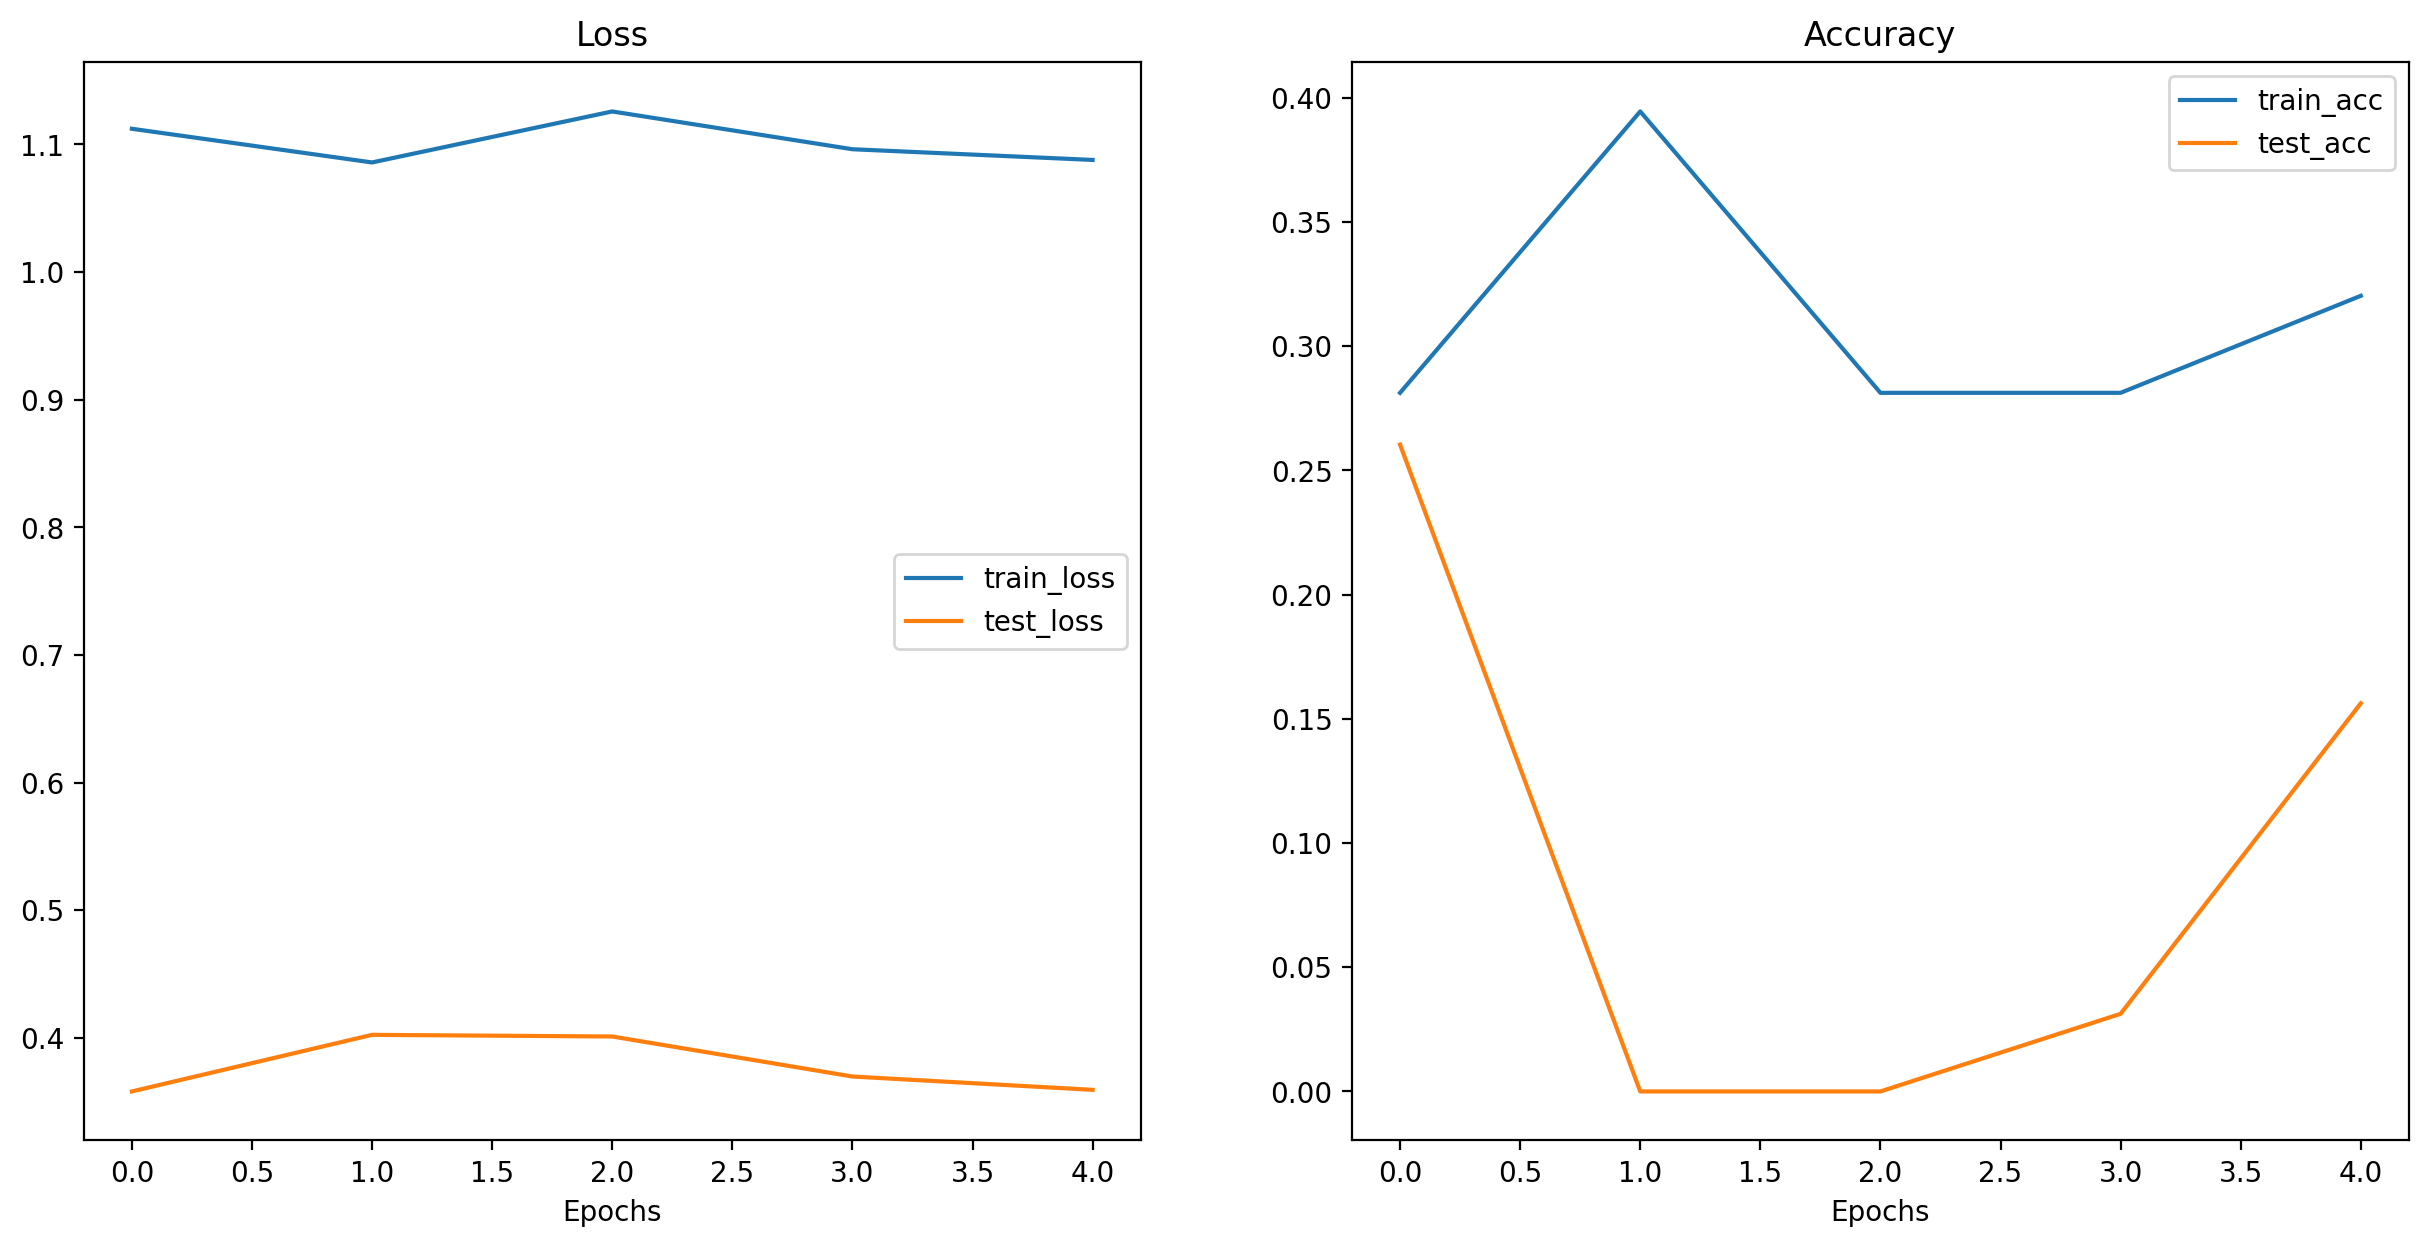

In [68]:
plot_loss_curves(results=model_0_results)

### TinyVGG with data augmentation

In [69]:
from torchvision import transforms
train_transform_trivialaugment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [70]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivialaugment)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [71]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        shuffle=True,
                                        batch_size=BATCH_SIZE)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    shuffle=False,
                                    batch_size=BATCH_SIZE)

In [72]:
model_1 = TinyVGG_V0(in_features=3,
                        hidden_units=10,
                        out_features=len(train_data_augmented.classes)).to(device=device)
model_1

TinyVGG_V0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [73]:
NUM_EPOCHS = 5
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                                lr=0.001)

from timeit import default_timer as timer
start_time = timer()
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        device=device,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1123 | Train Accuracy:  0.3008 | Test Loss: 0.3549 | Test Accuracy: 0.2708
Epoch: 1 | Train Loss: 1.0966 | Train Accuracy:  0.2891 | Test Loss: 0.3678 | Test Accuracy: 0.0000
Epoch: 2 | Train Loss: 1.0742 | Train Accuracy:  0.4102 | Test Loss: 0.3610 | Test Accuracy: 0.0000
Epoch: 3 | Train Loss: 1.0986 | Train Accuracy:  0.2812 | Test Loss: 0.3781 | Test Accuracy: 0.0417
Epoch: 4 | Train Loss: 1.0447 | Train Accuracy:  0.4609 | Test Loss: 0.3809 | Test Accuracy: 0.0729
Total training time: 5.300 seconds


### Plot out the loss curves

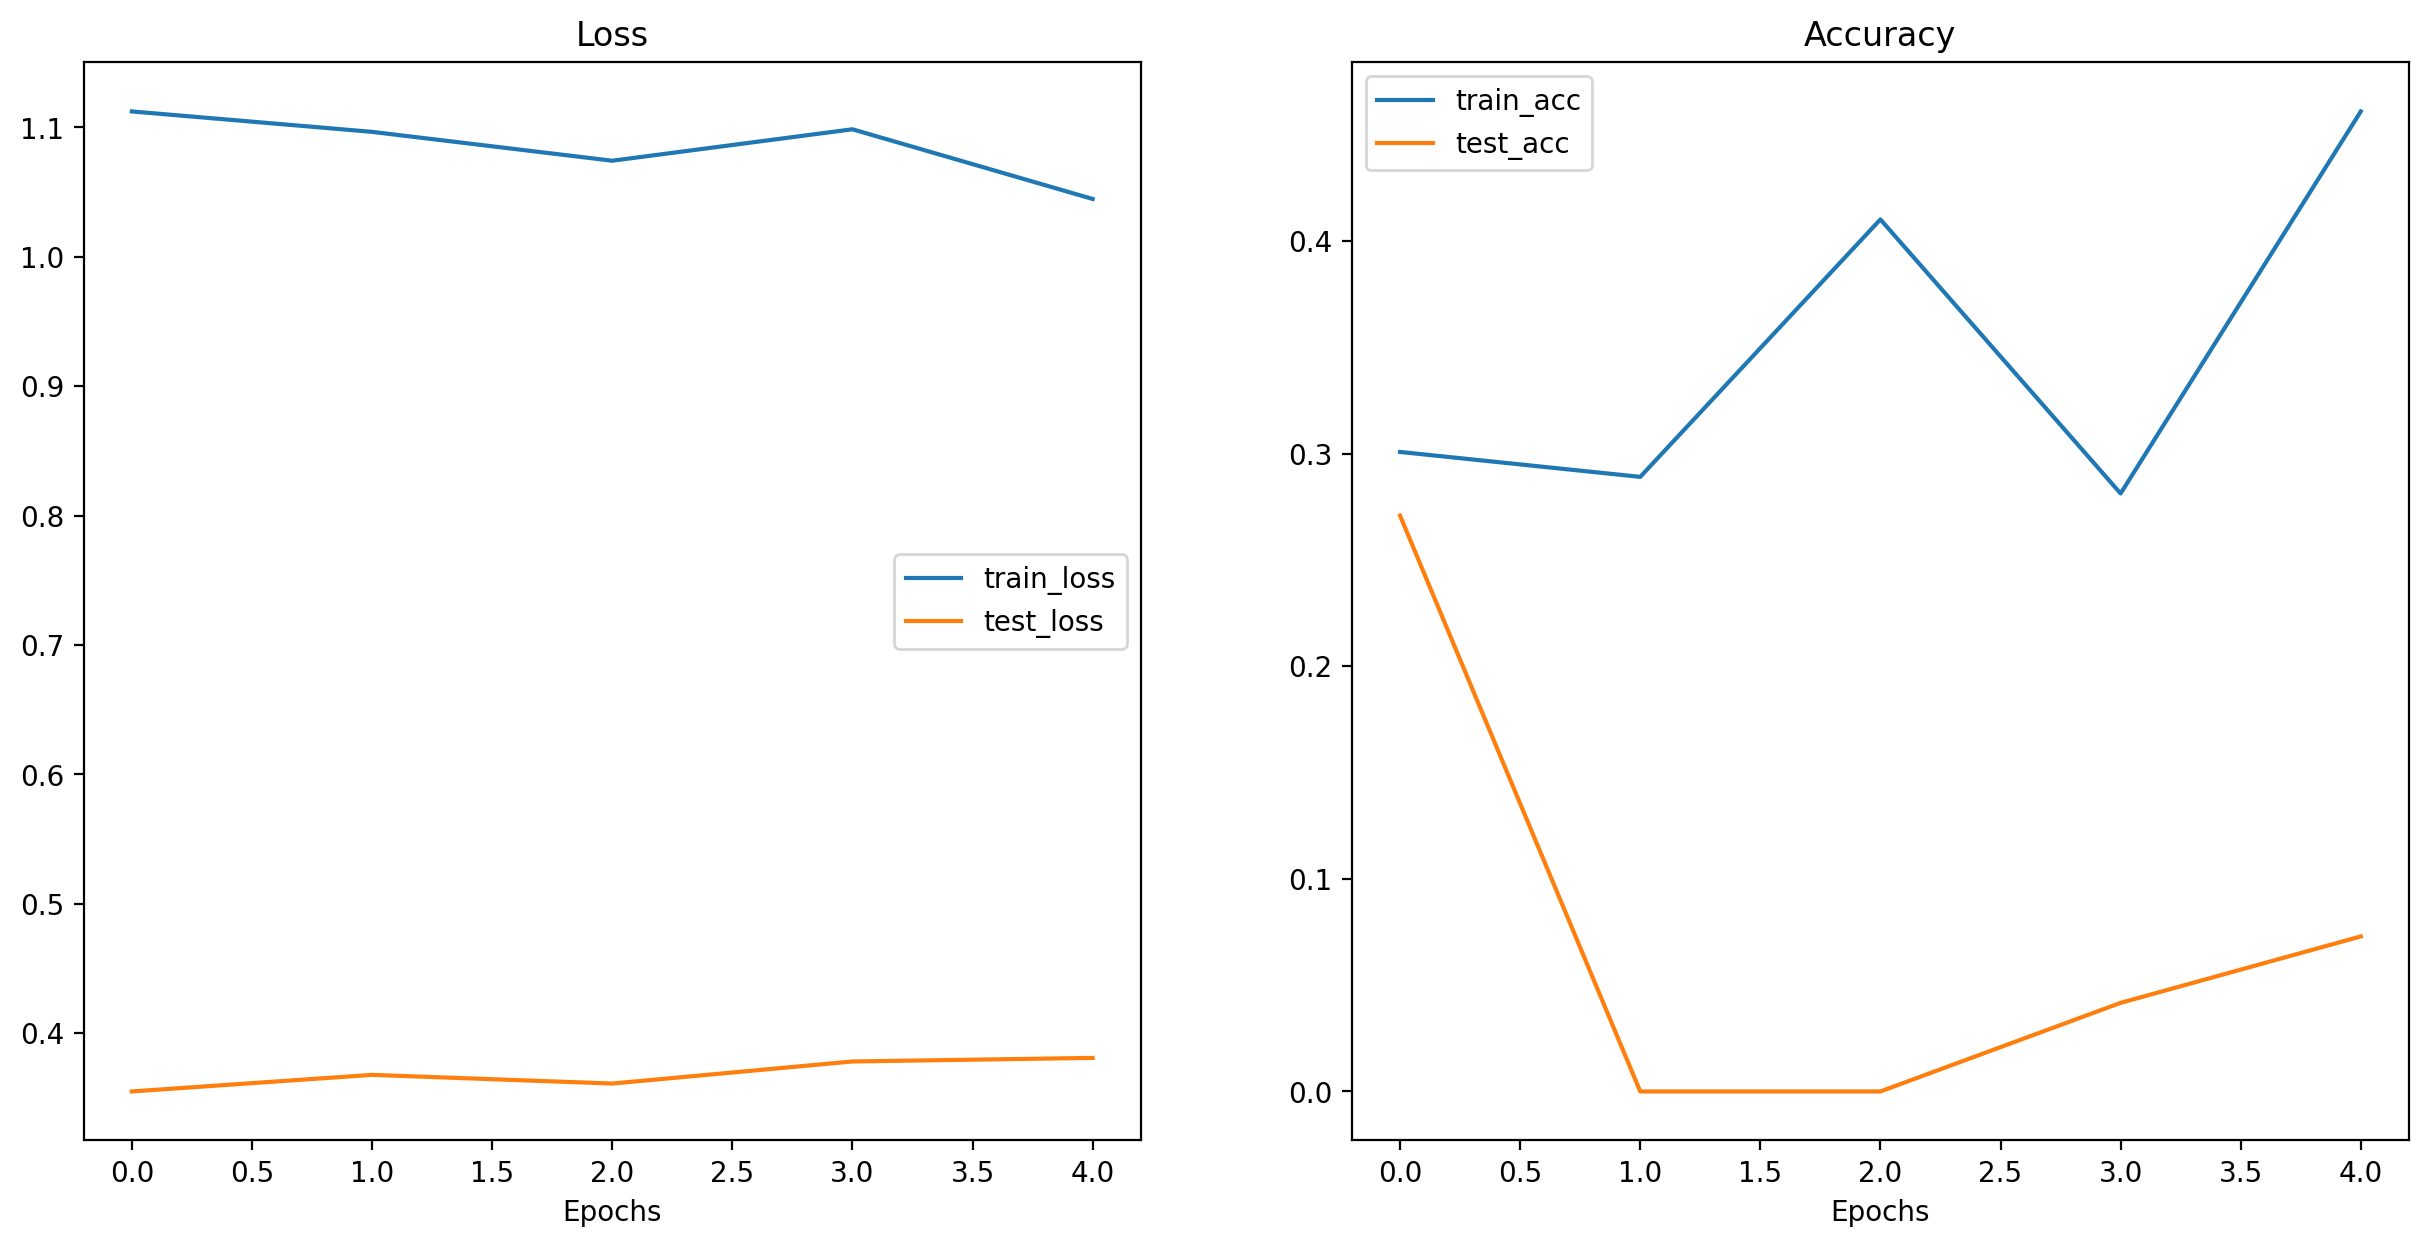

In [74]:
plot_loss_curves(model_1_results)

In [75]:
import pandas as pd

In [76]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.112323   0.281250   0.357993  0.260417
1    1.085931   0.394531   0.402347  0.000000
2    1.125897   0.281250   0.401047  0.000000
3    1.096283   0.281250   0.369691  0.031250
4    1.087900   0.320312   0.359251  0.156250

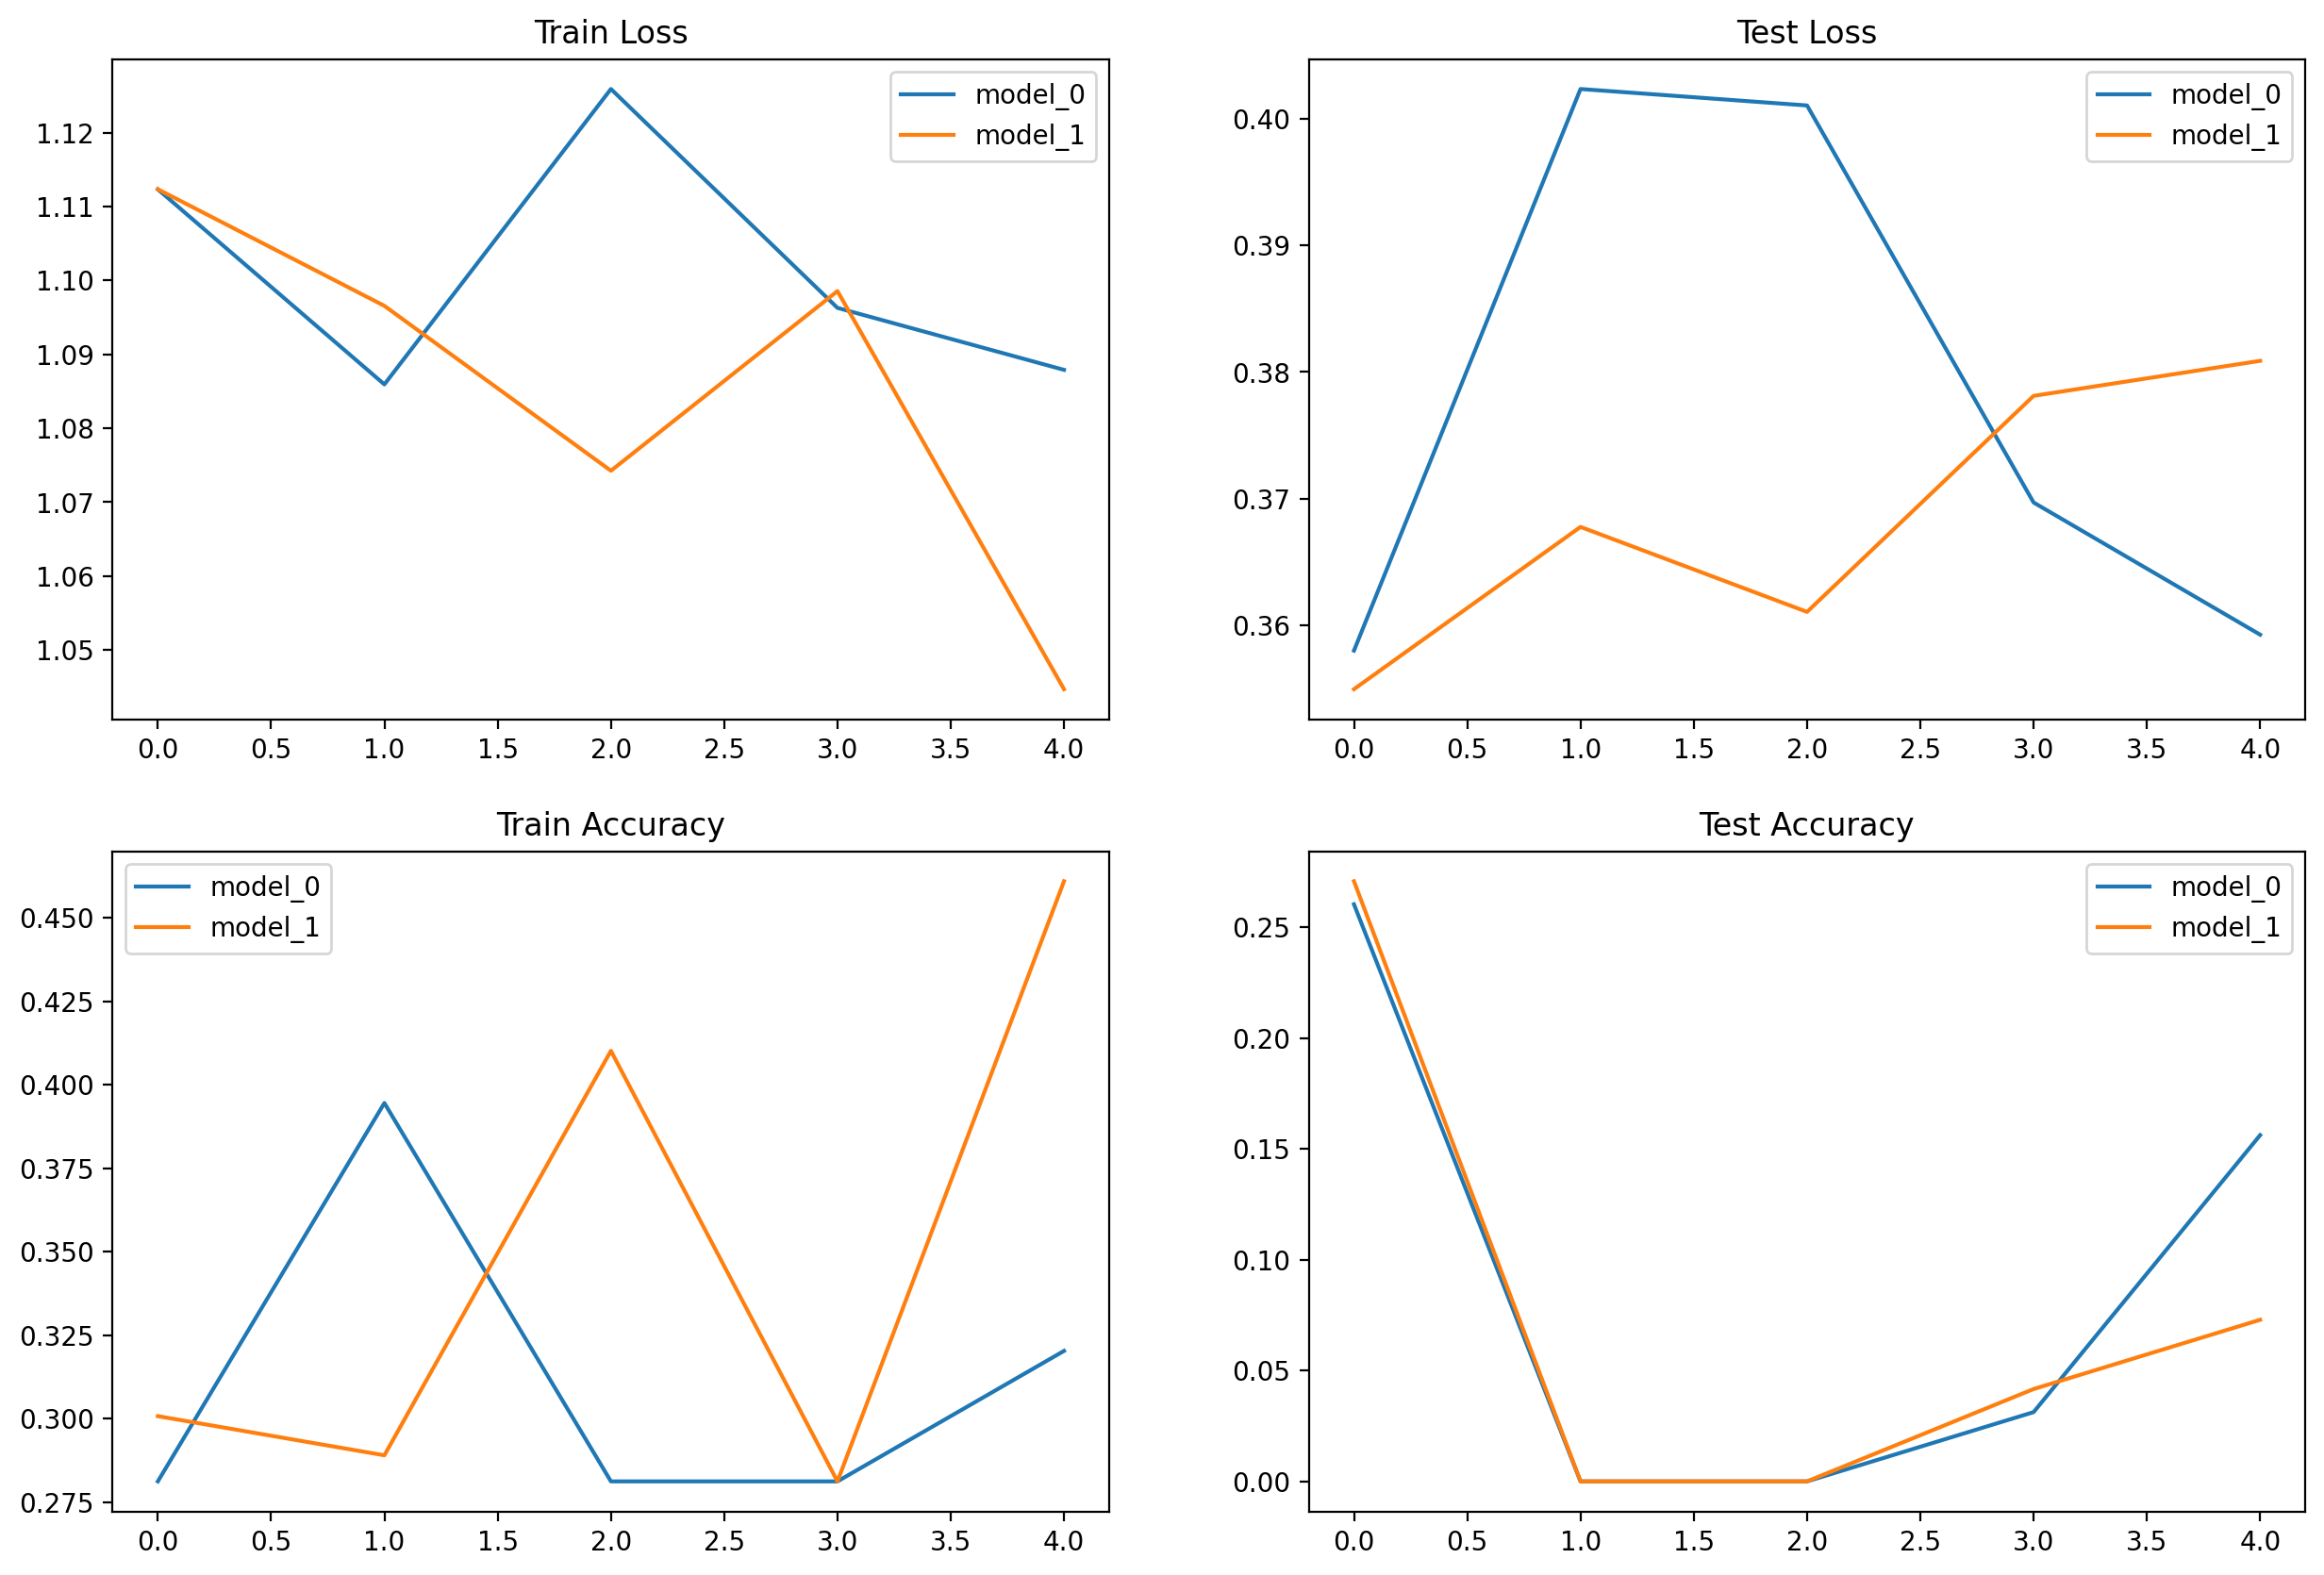

In [81]:
epochs = range(len(model_0_df))
# Plot Train Loss
plt.figure(figsize=(15, 10), dpi=200)
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="model_0")
plt.plot(epochs, model_1_df["train_loss"], label="model_1")
plt.title("Train Loss")
plt.legend();

# Plot Test Loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="model_0")
plt.plot(epochs, model_1_df["test_loss"], label="model_1")
plt.title("Test Loss")
plt.legend();

# Plot Train Accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="model_0")
plt.plot(epochs, model_1_df["train_acc"], label="model_1")
plt.title("Train Accuracy")
plt.legend();

# Plot Test Loss
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="model_0")
plt.plot(epochs, model_1_df["test_acc"], label="model_1")
plt.title("Test Accuracy")
plt.legend();

## Making Predictions on custom images

In [84]:
import requests
custom_data_path = data_path / "custom-image.jpeg"

if not custom_data_path.is_file():
    print(f"Downloading {custom_data_path}...")
    with open(custom_data_path, "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg")
        f.write(request.content)
else:
    print(f"File {custom_data_path} already exists...")

In [85]:
import torchvision
custom_img_uint8 = torchvision.io.read_image(str(custom_data_path))
print(f"Custom image tensor:\n {custom_img_uint8}")
print(f"Custom image shape:\n {custom_img_uint8.shape}")
print(f"Custom image dtype:\n {custom_img_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape:
 torch.Size([3, 4032, 3024])
Custom image dty

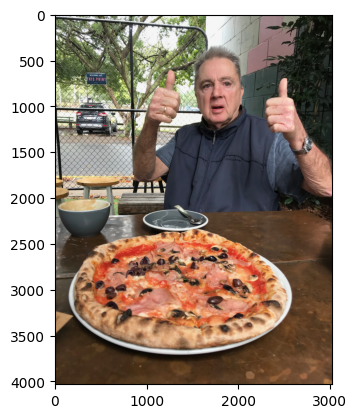

In [86]:
plt.imshow(custom_img_uint8.permute(1, 2, 0))

In [88]:
custom_img = torchvision.io.read_image(str(custom_data_path)).type(torch.float32)
custom_img.dtype

torch.float32

In [90]:
from torchvision import transforms
custom_transform = transforms.Compose([
    transforms.Resize((64, 64), antialias=None)
])

transformed_image = custom_transform(custom_img)

In [92]:
transformed_image = transformed_image / 255.

In [94]:
transformed_image = transformed_image.unsqueeze(dim=0)

In [98]:
model_1.eval()
with torch.inference_mode():
    custom_preds = model_1(transformed_image.to(device))

In [99]:
custom_preds

tensor([[-0.2247,  0.0318, -0.1507]], device='cuda:0')

In [100]:
custom_preds_probs = torch.softmax(custom_preds, dim=1)

In [101]:
custom_preds_probs

tensor([[0.2968, 0.3836, 0.3196]], device='cuda:0')

In [102]:
custom_preds_labels = torch.argmax(custom_preds_probs, dim=1)

In [103]:
class_names[custom_preds_labels]

'steak'

In [123]:
def pred_custom_data(path: str,
                        model:torch.nn.Module,
                        class_names: list,
                        device,
                        transform):
    custom_img = torchvision.io.read_image(str(path)).type(torch.float32)
    if transform:
        transformed_image_resize = transform(custom_img)
    transformed_image_resize = custom_transform(custom_img)
    transformed_image_norm = transformed_image_resize / 255.
    transformed_image = transformed_image_norm.unsqueeze(dim=0)
    model.to(device)
    model.eval()
    with torch.inference_mode():
        custom_preds = model(transformed_image.to(device))
    custom_preds_probs = torch.softmax(custom_preds, dim=1)
    custom_preds_labels = torch.argmax(custom_preds_probs, dim=1)
    pred_class = class_names[custom_preds_labels]
    plt.imshow(transformed_image_norm.permute(1, 2, 0))
    plt.title(f"Class: {pred_class} | Probability: {torch.max(custom_preds_probs[0]):.3f}")
    plt.axis(False)
    
    

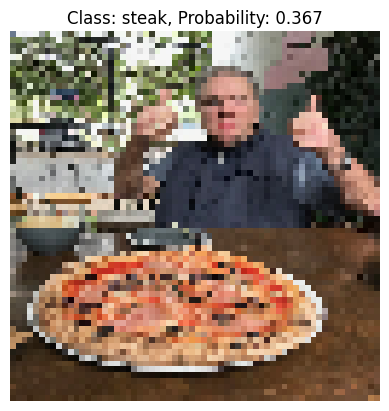

In [125]:
pred_custom_data(path=custom_data_path,
                 model=model_0,
                 class_names=class_names,
                 device=device,
                 transform=custom_transform)